# Biopython 
For anyone working with DNA or protein sequence information, `biopython` provides an extremely helpful set of tools. biopython gives the user the ability to programatically interact with biological sequence data and includes plugins to popular alignment and homology search algorithms such as BLAST or CLUSTAL, phylogenetic packages, and much more. We will barely scratch the surface today in the kinds of things that one can accomplish, so if you are interested you can start reading the documation [here](https://biopython.org/wiki/Documentation).

## Installing biopython
The first order of business is to install biopython, and a couple of helper programs on your system. Do that by using the command line or the anaconda prompt (on Windows systems) and type

`conda install -c anaconda biopython`

`conda install -c bioconda muscle`

` conda install -c bioconda paml`

that should be all that is needed

## Working with sequences
The first use case for us will be working with DNA sequences using biopython. biopython provides for us a `Seq` object, that contains at it's heart a string of biological sequence but that "knows" how to do certain tricks

In [7]:
from Bio.Seq import Seq
my_seq = Seq("AGTATCTTTGGT")
print(my_seq)

print(my_seq.complement())
print(my_seq.reverse_complement())

AGTATCTTTGGT
TCATAGAAACCA
ACCAAAGATACT


Aside from containing strings `Seq` objects also have an alphabet that can be set so that the object is even a bit smarter. For instance

In [9]:
my_seq = Seq("AGTATCTTTGGT")
#check the alphabet of my_seq
print(my_seq.alphabet) #returns a generic thing

#set alphabet specifically
from Bio.Alphabet import IUPAC
my_seq = Seq("AGTATCTTTGGT",IUPAC.unambiguous_dna)
print(my_seq.alphabet)

Alphabet()
IUPACUnambiguousDNA()


sequences generally behave as strings, meaning that you can index them and iterate over them, etc.

In [13]:
for c in my_seq:
    print(c)
    
print("here is my_seq[0]: ",my_seq[0])

A
G
T
A
T
C
T
T
T
G
G
T
here is my_seq[0]:  A


In [26]:
#compute GC percentage / 6-frame tx
from Bio.SeqUtils import GC,six_frame_translations
print(my_seq)
print("percent GC ",GC(my_seq))
print("\n")
print(six_frame_translations(my_seq))

AGTATCTTTGGT
percent GC  33.333333333333336


GC_Frame: a:2 t:6 g:3 c:1 
Sequence: agtatctttggt, 12 nt, 33.33 %GC


1/1
  Y  L  W
 V  S  L
S  I  F  G
agtatctttggt   33 %
tcatagaaacca
I  K  P 
 T  D  K  T
  Y  R  Q




there are many other basic sequence utilities that biopython provides. you have to wade through the sequtils documentation a bit to find out everything that it can do out of the box.

## Reading in sequences
Perhaps the single most useful thing that biopython provides is basic utilities to read and write from common data formats such as fasta and fastq. These parsers really aid in our ability to quickly make headway on even sophisticated datasets. We will work with a set of orchid rRNA gene sequences that you can download [here](https://raw.githubusercontent.com/biopython/biopython/master/Doc/examples/ls_orchid.fasta) although I have also included the file in the github repo notebooks directory.



In [ ]:
from Bio import SeqIO
for seq_record in SeqIO.parse("ls_orchid.fasta", "fasta"):
    print("id: ",seq_record.id,"length: ",len(seq_record.seq))


In [32]:
#a slightly different way to deal with the iterator that SeqIO.parse returns    
record_iterator = SeqIO.parse("ls_orchid.fasta", "fasta")
first_record = next(record_iterator)
print(first_record.id)
print(first_record.description)

second_record = next(record_iterator)
print(second_record.id)
print(second_record.description)

gi|2765658|emb|Z78533.1|CIZ78533
gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
gi|2765657|emb|Z78532.1|CCZ78532
gi|2765657|emb|Z78532.1|CCZ78532 C.californicum 5.8S rRNA gene and ITS1 and ITS2 DNA


### Getting sequences straight from Genbank
biopython has code that allows us to download sequences directly from genbank and suck them up in to memory for doing stuff. Here is an example

In [37]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(db="nucleotide", rettype="fasta", retmode="text", id="6273291") as handle:
    seq_record = SeqIO.read(handle, "fasta")
print(seq_record.id, seq_record.description)

AF191665.1 AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for chloroplast product, partial intron sequence


In [35]:
seq_record

SeqRecord(seq=Seq('TATACATTAAAGGAGGGGGATGCGGATAAATGGAAAGGCGAAAGAAAGAAAAAA...AGA', SingleLetterAlphabet()), id='AF191665.1', name='AF191665.1', description='AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for chloroplast product, partial intron sequence', dbxrefs=[])

we can get a bit more information if we retreive files in the so-called genbank format, in particular we will get annotation features associated with the sequence, if they exist in the genbank entry

In [43]:
from Bio import Entrez
from Bio import SeqIO
Entrez.email = "A.N.Other@example.com"
with Entrez.efetch(db="nucleotide", rettype="gb", retmode="text", id="6273291") as handle:
    seq_record = SeqIO.read(handle, "gb")
print(seq_record.id, seq_record.description)
print(seq_record.features)

AF191665.1 Opuntia marenae rpl16 gene; chloroplast gene for chloroplast product, partial intron sequence
[SeqFeature(FeatureLocation(ExactPosition(0), ExactPosition(902), strand=1), type='source'), SeqFeature(FeatureLocation(BeforePosition(0), AfterPosition(902), strand=1), type='gene'), SeqFeature(FeatureLocation(BeforePosition(0), AfterPosition(902), strand=1), type='intron')]


### Sequence files as dicts
If you have a large number of sequences in a file, it's usually best not to read them all in to memory at once. biopython has you covered here functions that will open up a sequence file as sa dictionary that you can query by key



In [48]:
orchid_dict = SeqIO.index("ls_orchid.fasta", "fasta")
print(list(orchid_dict.keys())[0:5])

['gi|2765658|emb|Z78533.1|CIZ78533', 'gi|2765657|emb|Z78532.1|CCZ78532', 'gi|2765656|emb|Z78531.1|CFZ78531', 'gi|2765655|emb|Z78530.1|CMZ78530', 'gi|2765654|emb|Z78529.1|CLZ78529']


In [52]:
seq_record = orchid_dict["gi|2765658|emb|Z78533.1|CIZ78533"]
print(seq_record.description)
print(seq_record.seq)

gi|2765658|emb|Z78533.1|CIZ78533 C.irapeanum 5.8S rRNA gene and ITS1 and ITS2 DNA
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGATGAGACCGTGGAATAAACGATCGAGTGAATCCGGAGGACCGGTGTACTCAGCTCACCGGGGGCATTGCTCCCGTGGTGACCCTGATTTGTTGTTGGGCCGCCTCGGGAGCGTCCATGGCGGGTTTGAACCTCTAGCCCGGCGCAGTTTGGGCGCCAAGCCATATGAAAGCATCACCGGCGAATGGCATTGTCTTCCCCAAAACCCGGAGCGGCGGCGTGCTGTCGCGTGCCCAATGAATTTTGATGACTCTCGCAAACGGGAATCTTGGCTCTTTGCATCGGATGGAAGGACGCAGCGAAATGCGATAAGTGGTGTGAATTGCAAGATCCCGTGAACCATCGAGTCTTTTGAACGCAAGTTGCGCCCGAGGCCATCAGGCTAAGGGCACGCCTGCTTGGGCGTCGCGCTTCGTCTCTCTCCTGCCAATGCTTGCCCGGCATACAGCCAGGCCGGCGTGGTGCGGATGTGAAAGATTGGCCCCTTGTGCCTAGGTGCGGCGGGTCCAAGAGCTGGTGTTTTGATGGCCCGGAACCCGGCAAGAGGTGGACGGATGCTGGCAGCAGCTGCCGTGCGAATCCCCCATGTTGTCGTGCTTGTCGGACAGGCAGGAGAACCCTTCCGAACCCCAATGGAGGGCGGTTGACCGCCATTCGGATGTGACCCCAGGTCAGGCGGGGGCACCCGCTGAGTTTACGC


### Converting between file formats

Again biopython has you covered for basic conversions between file formats. For instance

In [64]:
from Bio import SeqIO
count = SeqIO.convert("ls_orchid.fasta", "fasta", "my_example.pir", "pir")
print("Converted %i records" % count)


Converted 94 records


## Doing multiple sequence alignment
not only can biopython read and write multiple sequence alignments (MSAs) and cleanly represent them in memory, but biopython can even help you create MSAs. 
biopython can work as glue that binds together familiar bioinformatics programs, allowing us to pass information from memory to programs and then back. This depends on having "helper" programs installed that will do the heavy lifting, for instance an alignment program. When we started off this lecture we installed the aligner MUSCLE using conda. We will use the interface to MUSCLE to demostrate this functionality.

In particular we will do an alignment of the sequences in that orchid fasta file we have been playing with

In [75]:
import os
from Bio.Align.Applications import MuscleCommandline
cline = MuscleCommandline("MUSCLE", input="ls_orchid.fasta", out="aligned_orchid.fasta")
muscle_exe = "/Users/adk/miniconda3/bin/MUSCLE"
assert os.path.isfile(muscle_exe), "MEUSCL executable missing"
stdout, stderr = cline()
# this will take a while
# can print stderr if you want to see what happened

In [80]:
#now suck back in the file
from Bio import AlignIO

orchid = AlignIO.read("aligned_orchid.fasta","fasta")
print(orchid)

SingleLetterAlphabet() alignment with 94 rows and 869 columns
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765655|emb|Z78530.1|CMZ78530
-----------------ACGGCGAGCTGCCGAAGGA-CATTGTT...AA- gi|2765654|emb|Z78529.1|CLZ78529
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGAT...CGC gi|2765658|emb|Z78533.1|CIZ78533
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765656|emb|Z78531.1|CFZ78531
----------------------------------------TGTT...--- gi|2765650|emb|Z78525.1|CAZ78525
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...AGC gi|2765649|emb|Z78524.1|CFZ78524
CGTAACCAGGTTTCCGTAGGTGAACCTGCGGCAGGATCATTGTT...AG- gi|2765648|emb|Z78523.1|CHZ78523
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765645|emb|Z78520.1|CSZ78520
--------------------------------------------...--- gi|2765644|emb|Z78519.1|CPZ78519
---------------GTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765646|emb|Z78521.1|CCZ78521
CGTAACAAGGTTTCCGTAGGTGAACCTGCGGAAGGATCATTGTT...--- gi|2765647|emb|Z78522.1|CMZ78522
CGTAACAAGGTTTC

these alignment objects behave as you would expect. for instance we can slice them just as we would numpy arrays to get subsets of the aligned sequences, windows of the alignment, or both

In [85]:
print(orchid[0:2,10:20])

SingleLetterAlphabet() alignment with 2 rows and 10 columns
TTTCCGTAGG gi|2765655|emb|Z78530.1|CMZ78530
-------ACG gi|2765654|emb|Z78529.1|CLZ78529


In [ ]:
#get summary info
from Bio.Align import AlignInfo
summary_align = AlignInfo.SummaryInfo(orchid)
consensus = summary_align.dumb_consensus()
print(consensus)

In [118]:
# Position specific weight matrix for bp 100-110
summary_align = AlignInfo.SummaryInfo(orchid[:,0:10])
consensus = summary_align.dumb_consensus()
print("consensus sequence: ",consensus)
my_pssm = summary_align.pos_specific_score_matrix(consensus, chars_to_ignore = ['N'])
print(my_pssm)

consensus sequence:  CGTAACAAGG
    -   A   C   G   T
C  11.0 0.0 83.0 0.0 0.0
G  10.0 0.0 1.0 82.0 1.0
T  10.0 0.0 0.0 1.0 83.0
A  10.0 82.0 2.0 0.0 0.0
A  10.0 84.0 0.0 0.0 0.0
C  10.0 0.0 84.0 0.0 0.0
A  10.0 76.0 6.0 2.0 0.0
A  10.0 83.0 0.0 0.0 1.0
G  10.0 0.0 0.0 84.0 0.0
G  10.0 0.0 0.0 84.0 0.0



## Trees and Phylogenetics
bipython also gives us lots of basic functionality for dealing with trees. this includes reading/writing/converting trees, tree visualization tools, and interfaces to external phylogenetics packages such as phylip and PAML

To start I've included a toy tree example named `tree.newick` in the notebooks directory. That file is written in the [Newick](https://en.wikipedia.org/wiki/Newick_format) format which uses a series of parentheses to describe the relations of taxa up a tree. In this case I've used the tree

`(((1,2),(3,4)),(5,6));`

We will start by reading in the tree and using the native print() to summarize it

In [89]:
from Bio import Phylo

tree = Phylo`.read("tree.newick", "newick")
print(tree)

Tree(rooted=False, weight=1.0)
    Clade()
        Clade()
            Clade()
                Clade(name='1')
                Clade(name='2')
            Clade()
                Clade(name='3')
                Clade(name='4')
        Clade()
            Clade(name='5')
            Clade(name='6')


We can also draw the tree quite easily

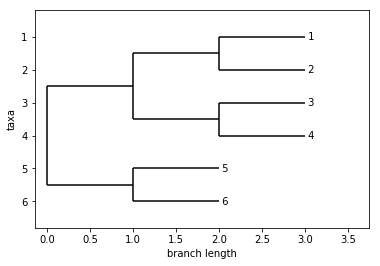

In [92]:
Phylo.draw(tree)

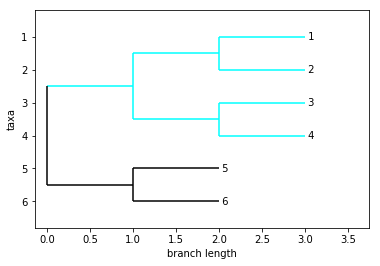

In [100]:
mrca = tree.common_ancestor({"name": "1"}, {"name": "3"})
mrca.color="cyan"
Phylo.draw(tree)

## Using PAML for phylogenetics
For a number of you in here phylogenetics will be one of your common use points for computational biology. biopython has all these neat built ins that help you do things efficiently, without having to reinvent the wheel. 

Among these there exists a nice interface with the popular PAML software package. PAML allows us to perform maximum likelihood phylogenetic estimation in a flexible way. The reason it is so popular though is that it implements a number of tests for positive selection using comparisons of the rate of substitution between synonymous sites ($dS$) and nonsynonymous sites ($dN$). Briefly PAML can estimate the ratio of substitutions rates $\omega = dN / dS$. If all mutations had no effect on fitness than we should expect these rates to be equivalent and $\omega = 1$. If however most mutations at nonsynonymous sites were harmful and thus deleterious to the fitness of the organism, we would expect $\omega < 1$. If on the other nonsynonymous mutations were beneficial on average we could expect $\omega > 1$.

Let's use PAML quickly to play with these ideas.

In [139]:
from Bio.Phylo.PAML import codeml
cml = codeml.Codeml(alignment = "lysozymeSmall.txt", tree = "lysozymeSmall.trees",
                    out_file = "results.out", working_dir = ".")


In [140]:
#set some PAML options
#can set them manually
cml.set_options(noisy=9,verbose=1,runmode=0,seqtype=1)
#or with a control file
cml.read_ctl_file("lysozymeSmall.ctl")
cml.print_options()

noisy = 9
verbose = 1
runmode = 0
seqtype = 1
CodonFreq = 2
ndata = None
clock = 0
aaDist = None
aaRatefile = None
model = 2
NSsites = 0
icode = 0
Mgene = None
fix_kappa = 0
kappa = 2
fix_omega = 0
omega = 1
fix_alpha = 1
alpha = 0.0
Malpha = 0
ncatG = 4
getSE = 0
RateAncestor = 0
Small_Diff = None
cleandata = None
fix_blength = None
method = 0
rho = None
fix_rho = None


In [143]:
result_dict=cml.run()

In [148]:
for k in result_dict.keys():
    print(k)
print()    
print(result_dict['model'])

version
model
codon model
NSsites

several dN/dS ratios for branches for branches, 


In [161]:
print(list(result_dict['NSsites'][0].keys()))
print(list(result_dict['NSsites'][0]['parameters']['omega']))


['description', 'lnL', 'tree length', 'tree', 'parameters']
[0.68581, 3.50573]


In [162]:
result_dict

{'version': '4.9',
 'model': 'several dN/dS ratios for branches for branches, ',
 'codon model': 'F3x4',
 'NSsites': {0: {'description': 'one-ratio',
   'lnL': -904.636553,
   'tree length': 0.55905,
   'tree': '((1: 0.025569, 2: 0.038928): 0.070001, ((3: 0.043878, 4: 0.052150): 0.079045, 5: 0.019486): 0.043879, (6: 0.041033, 7: 0.023778): 0.121307);',
   'parameters': {'parameter list': '0.070001 0.025569 0.038928 0.043879 0.079045 0.043878 0.052150 0.019486 0.121307 0.041033 0.023778 4.561197 0.685810 3.505727',
    'kappa': 4.5612,
    'omega': [0.68581, 3.50573],
    'branches': {'8..9': {'t': 0.07,
      'N': 282.2,
      'S': 107.8,
      'omega': 0.6858,
      'dN': 0.0207,
      'dS': 0.0302,
      'N*dN': 5.8,
      'S*dS': 3.3},
     '9..1': {'t': 0.026,
      'N': 282.2,
      'S': 107.8,
      'omega': 0.6858,
      'dN': 0.0076,
      'dS': 0.011,
      'N*dN': 2.1,
      'S*dS': 1.2},
     '9..2': {'t': 0.039,
      'N': 282.2,
      'S': 107.8,
      'omega': 0.6858,
   

TypeError: 'float' object is not iterable